/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 1. IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 2. IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar, por cuestiones de anonimato no vamos a mostrar el resultado.

In [5]:
import pandas as pd
import os  # Asegúrate de importar el módulo os

# Defino el directorio de los archivos y el rango de meses
directorio = 'D:/Tesis/Definitivos/Nuevo'
meses = range(1, 13)  # Meses de enero a diciembre del año 2023

# Inicializamos una lista para almacenar los DataFrames
df_list = []

# Iteramos sobre los meses y leer los archivos
for mes in meses:
    archivo = os.path.join(directorio, f'SetDatos_NBCH_{mes:02d}2023.csv')
    
    # Leemos el archivo en un DataFrame y agregarlo a la lista
    df_mora = pd.read_csv(archivo, low_memory=False, encoding='ISO-8859-1')
    df_list.append(df_mora)

# Concatenamos todos los DataFrames de la lista en uno solo
df_compilado = pd.concat(df_list, ignore_index=True)

# Separamos en X (todas las columnas menos la última) e Y (la última columna)
X = df_compilado.iloc[:, :-1]
y = df_compilado.iloc[:, -1].values

# 3. PREPARACIÓN DE DATOS

# 3.1. Breve análisis descriptivo de los datos

Cantidad de registros que tiene el dataset compilado

In [9]:
numero_de_registros = df_compilado.shape[0]
print(f"Número de registros: {numero_de_registros}")

Número de registros: 1627142


Se realiza una verificación de que se hayan importado todos los registros de los distintos periodos

In [11]:
conteo_por_periodo = df_compilado.groupby('Periodo').size()
# Mostrar el resultado
print(conteo_por_periodo)

Periodo
202301    133271
202302    134453
202303    136778
202304    135453
202305    139953
202306    135132
202307    135111
202308    136636
202309    133374
202310    135629
202311    133480
202312    137872
dtype: int64


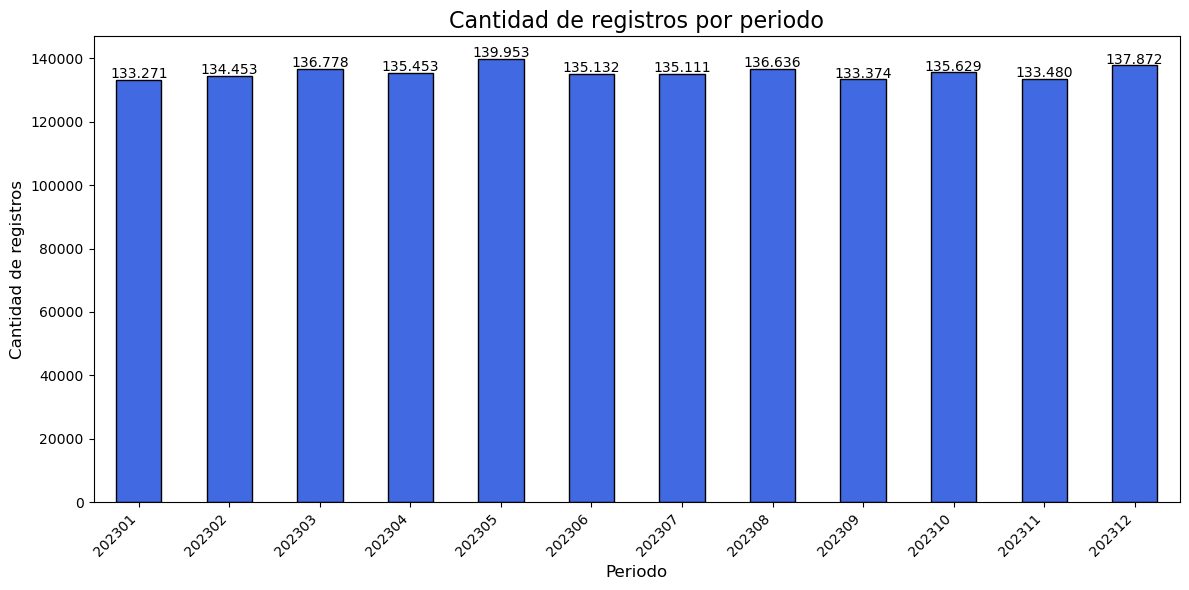

In [12]:
plt.figure(figsize=(12, 6))  
conteo_por_periodo.plot(kind='bar', color='royalblue', edgecolor='black')  


plt.title('Cantidad de registros por periodo', fontsize=16) 
plt.xlabel('Periodo', fontsize=12)  
plt.ylabel('Cantidad de registros', fontsize=12)  


for i in range(len(conteo_por_periodo)):
    plt.text(i, conteo_por_periodo.iloc[i] + 500, f"{conteo_por_periodo.iloc[i]:,}".replace(',', '.'), 
             ha='center', fontsize=10, color='black') 


plt.xticks(rotation=45, ha='right', fontsize=10)  


plt.tight_layout()

# Mostrar el gráfico
plt.show()


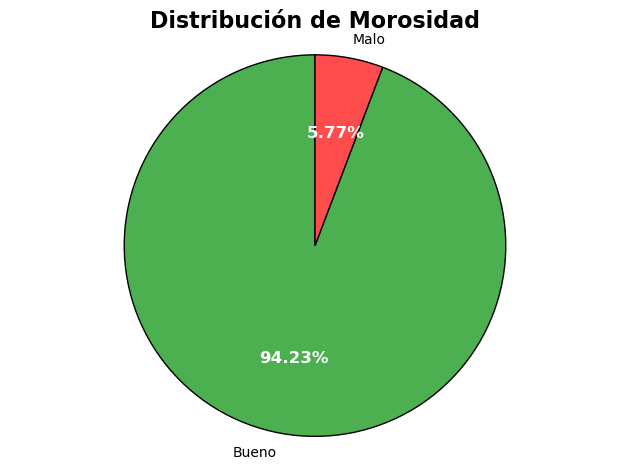

In [13]:
import matplotlib.pyplot as plt

# Datos y etiquetas
conteo_morosidad = df_compilado['Morosidad'].value_counts()
valores = conteo_morosidad.values
etiquetas = conteo_morosidad.index

# Asignar colores: Rojo para "Malo" y Verde para "Bueno"
colores = ['#FF4C4C' if etiqueta == 'Malo' else '#4CAF50' for etiqueta in etiquetas]

# Crear el gráfico de torta
fig, ax = plt.subplots()
autotexts = plt.pie(valores, labels=etiquetas, autopct='%.2f%%', colors=colores, startangle=90, wedgeprops={'edgecolor': 'black'})

# Ajustar propiedades de las etiquetas dentro del gráfico
for autotext in autotexts[2]:  
    autotext.set_color('white')  
    autotext.set_fontsize(12)  
    autotext.set_fontweight('bold')  

# Añadir título
plt.title("Distribución de Morosidad", fontsize=16, fontweight='bold')

plt.axis('equal')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


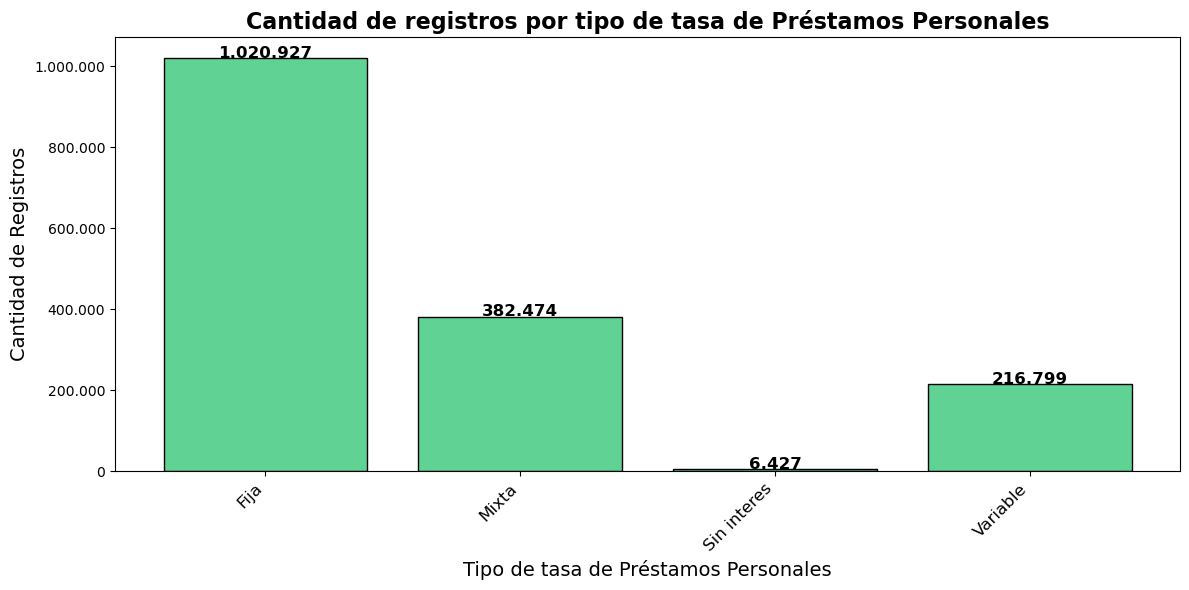

In [14]:
conteo_por_tasa = df_compilado.groupby('Tasa_PrestamosPersonales').size()


plt.figure(figsize=(12, 6))  
plt.bar(conteo_por_tasa.index, conteo_por_tasa.values, color='#60D394', edgecolor='black') 


plt.title('Cantidad de registros por tipo de tasa de Préstamos Personales', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de tasa de Préstamos Personales', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)


for i in range(len(conteo_por_tasa)):
    plt.text(i, conteo_por_tasa.values[i] + 100, f"{conteo_por_tasa.values[i]:,}".replace(",", "."), ha='center', fontsize=12, fontweight='bold')  # Aumentar el tamaño de las etiquetas


plt.xticks(range(len(conteo_por_tasa)), conteo_por_tasa.index, rotation=45, ha='right', fontsize=12)


plt.ticklabel_format(style='plain', axis='y') 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))


plt.tight_layout()

# Mostrar el gráfico
plt.show()


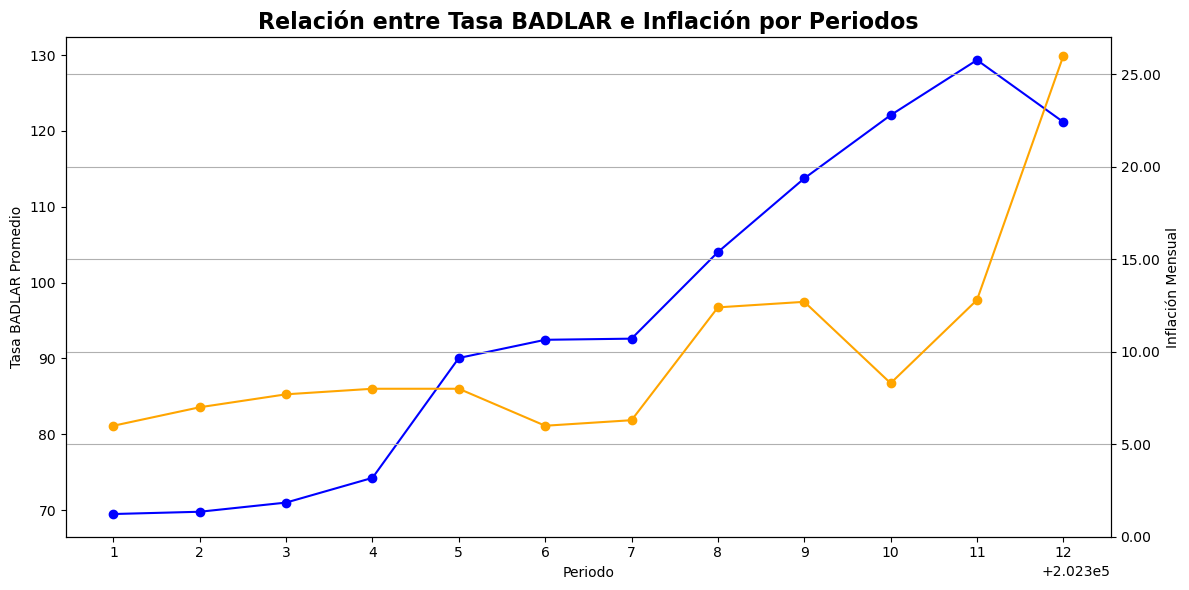

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agruparmos por 'Periodo' y calcular el promedio de 'TasaBADLAR_Promedio' e 'InflaciónMensual'
df_grouped = df_compilado.groupby('Periodo').agg({
    'TasaBADLAR_Promedio': 'mean',
    'InflaciónMensual': 'mean'
}).reset_index()

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 6))

# Eje Y principal para Tasa BADLAR
plt.plot(df_grouped['Periodo'], df_grouped['TasaBADLAR_Promedio'], marker='o', label='Tasa BADLAR Promedio', color='blue')
plt.xlabel('Periodo')
plt.ylabel('Tasa BADLAR Promedio')

# Eje Y secundario para Inflación
ax2 = plt.gca().twinx()
ax2.plot(df_grouped['Periodo'], df_grouped['InflaciónMensual'], marker='o', label='Inflación Mensual', color='orange')
ax2.set_ylabel('Inflación Mensual')

# Configuramos el gráfico
plt.title('Relación entre Tasa BADLAR e Inflación por Periodos', fontsize=16, fontweight='bold')
plt.xticks(df_grouped['Periodo'], rotation=45)  # Mostrar todos los periodos
plt.grid()

# Cambiamos el color de los ejes Y a negro
plt.gca().yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')
plt.tick_params(axis='y', colors='black')
ax2.tick_params(axis='y', colors='black')

# Establecemos los límites de los ejes Y
plt.gca().set_ylim(bottom=0)  # Eje Y principal desde 0
ax2.set_ylim(bottom=0)  # Eje Y secundario desde 0

# Evitamos notación científica en el eje Y secundario
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Descripción de los tipos de datos del fichero cargado

In [17]:
df_compilado.dtypes

Suc                                     int64
Tipo Doc                                int64
Nro Doc                                 int64
Denominacion                           object
CUIL                                    int64
Periodo                                 int64
Id_Doc                                 object
Segmento                               object
Genero                                 object
Edad                                  float64
Antiguedad                            float64
CA_acreditaciones                     float64
CA_SaldoPromedio_$                    float64
CA_SaldoPromedio_U$s                  float64
TC_Master_Cantidad                    float64
TC_Master_SaldoPesos                  float64
TC_Visa_Cantidad                      float64
TC_Visa_SaldoPesos                    float64
TC_Tuya_Cantidad                      float64
TC_Tuya_SaldoPesos                    float64
Cantidad_PrestamosPersonales          float64
Importe_PrestamosPersonales       

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 3.2 Proceso ETL aplicado al conjunto de datos

## 3.2.1. Análisis y corrección de datos nulos en el conjunto de datos

### 3.2.1.1. Verificación de datos nulos en el conjunto de datos

In [23]:
nulos = df_compilado.isnull().sum()
nulos_df = pd.DataFrame(nulos, columns=['Cantidad de Valores Nulos'])


nulos_df.reset_index(inplace=True)
nulos_df.columns = ['Variable', 'Cantidad de Valores Nulos']


print(nulos_df.to_string(index=False))

                          Variable  Cantidad de Valores Nulos
                               Suc                          0
                          Tipo Doc                          0
                           Nro Doc                          0
                      Denominacion                          0
                              CUIL                          0
                           Periodo                          0
                            Id_Doc                          0
                          Segmento                      75324
                            Genero                        265
                              Edad                        265
                        Antiguedad                        355
                 CA_acreditaciones                      75324
                CA_SaldoPromedio_$                       6249
              CA_SaldoPromedio_U$s                    1510776
                TC_Master_Cantidad                    1516886
        

### 3.2.1.2. Análisis y corrección de datos nulos en el conjunto de datos

Los valores nulos en las columnas Cantidad_PrestamosPersonales, Importe_PrestamosPersonales, Tasa_PrestamosPersonales, Plazo_Maximo_PrestamosPersonales, Plazo_Promedio_PrestamosPersonales y Atraso_Maximo_PrestamosPersonales corresponden a clientes que no poseen préstamos personales. Dado que uno de los requisitos del análisis es que los registros cumplan con esta condición, se eliminan esos registros del conjunto de datos.

In [26]:

variables_a_eliminar_nulos = [
    'Cantidad_PrestamosPersonales',
    'Importe_PrestamosPersonales',
    'Tasa_PrestamosPersonales',
    'Plazo_Maximo_PrestamosPersonales',
    'Plazo_Promedio_PrestamosPersonales',
    'Atraso_Maximo_PrestamosPersonales'
]

df_mora_prestamos = df_compilado.dropna(subset=variables_a_eliminar_nulos)


print(f"Número de filas después de eliminar nulos: {df_mora_prestamos.shape[0]}")

Número de filas después de eliminar nulos: 1626627


Verificamos el resto de los duplicados

In [28]:
df_mora_prestamos.isnull().sum()

Suc                                         0
Tipo Doc                                    0
Nro Doc                                     0
Denominacion                                0
CUIL                                        0
Periodo                                     0
Id_Doc                                      0
Segmento                                75252
Genero                                    265
Edad                                      265
Antiguedad                                355
CA_acreditaciones                       75252
CA_SaldoPromedio_$                       6177
CA_SaldoPromedio_U$s                  1510558
TC_Master_Cantidad                    1516680
TC_Master_SaldoPesos                  1516680
TC_Visa_Cantidad                      1349409
TC_Visa_SaldoPesos                    1349409
TC_Tuya_Cantidad                       836641
TC_Tuya_SaldoPesos                     836641
Cantidad_PrestamosPersonales                0
Importe_PrestamosPersonales       

Las columnas Plazo Fijo y Cantidad_PlazoFijo se refieren a los productos de plazo fijo que pueden tener los clientes. Si estos valores son nulos, significa que el cliente no posee un plazo fijo. Por lo tanto, se reemplazan los valores nulos por "0" para indicar la ausencia de ese producto.

De forma similar, las columnas TC_Master_Cantidad, TC_Master_SaldoPesos, TC_Visa_Cantidad, TC_Visa_SaldoPesos, TC_Tuya_Cantidad y TC_Tuya_SaldoPesos corresponden a información sobre tarjetas de crédito MasterCard, Visa y Tuya. Los valores nulos en estas columnas indican que el cliente no tiene estas tarjetas o no ha utilizado el saldo de las mismas. Por eso, también se reemplazan por "0" para reflejar la ausencia de estas tarjetas o transacciones.

En resumen, el "0" en estas columnas indica que el cliente no tiene ese producto financiero en particular.

In [30]:

df_mora_prestamos.loc[:, ['Plazo Fijo', 'Cantidad_PlazoFijo']] = df_mora_prestamos[['Plazo Fijo', 'Cantidad_PlazoFijo']].fillna(0)


df_mora_prestamos.loc[:, ['TC_Master_Cantidad', 'TC_Master_SaldoPesos', 'TC_Visa_Cantidad', 'TC_Visa_SaldoPesos', 'TC_Tuya_Cantidad', 'TC_Tuya_SaldoPesos']] = df_mora_prestamos[['TC_Master_Cantidad', 'TC_Master_SaldoPesos', 'TC_Visa_Cantidad', 'TC_Visa_SaldoPesos', 'TC_Tuya_Cantidad', 'TC_Tuya_SaldoPesos']].fillna(0)


Se comprueba si hay alguna característica con valores faltantes NaN o Null

Refieren a los productos de cajas de ahorros en dólares que pueden tener los clientes en la entidad. Si estos valores son nulos, significa que el cliente no posee un caja de ahorro en dólares. Por lo tanto, se reemplazan los valores nulos por "0" para indicar la ausencia de ese producto.

In [33]:
df_mora_prestamos.loc[:, ['CA_SaldoPromedio_U$s']] = df_mora_prestamos[['CA_SaldoPromedio_U$s']].fillna(0.00)
df_mora_prestamos.loc[:, ['CA_SaldoPromedio_$' ]] = df_mora_prestamos[['CA_SaldoPromedio_$']].fillna(0.00)

Se refiere a las acreditaciones que tiene el cliente en la Entidad. Si estos valores son nulos, significa que el cliente no tiene acreditaciones. Por lo tanto, se reemplazan los valores nulos por "0" para indicar la ausencia de importe

In [35]:
df_mora_prestamos.loc[:, ['CA_acreditaciones']] = df_mora_prestamos[['CA_acreditaciones']].fillna(0.00)
df_mora_prestamos.loc[:, ['Acreditaciones_sueldos' ]] = df_mora_prestamos[['Acreditaciones_sueldos']].fillna(0.00)
df_mora_prestamos.loc[:, ['Otras_Acreditaciones' ]] = df_mora_prestamos[['Otras_Acreditaciones']].fillna(0.00)

In [36]:
df_mora_prestamos.isnull().sum()

Suc                                       0
Tipo Doc                                  0
Nro Doc                                   0
Denominacion                              0
CUIL                                      0
Periodo                                   0
Id_Doc                                    0
Segmento                              75252
Genero                                  265
Edad                                    265
Antiguedad                              355
CA_acreditaciones                         0
CA_SaldoPromedio_$                        0
CA_SaldoPromedio_U$s                      0
TC_Master_Cantidad                        0
TC_Master_SaldoPesos                      0
TC_Visa_Cantidad                          0
TC_Visa_SaldoPesos                        0
TC_Tuya_Cantidad                          0
TC_Tuya_SaldoPesos                        0
Cantidad_PrestamosPersonales              0
Importe_PrestamosPersonales               0
Tasa_PrestamosPersonales        

Mejoramos el genero de los datos que estan nulos

In [38]:
df_mora_prestamos.loc[df_mora_prestamos['Genero'].isnull() & df_mora_prestamos['CUIL'].astype(str).str.startswith(('20')), 'Genero'] = 'M'
df_mora_prestamos.loc[df_mora_prestamos['Genero'].isnull() & df_mora_prestamos['CUIL'].astype(str).str.startswith(('27')), 'Genero'] = 'F'

In [39]:
df_mora_prestamos.isnull().sum()

Suc                                       0
Tipo Doc                                  0
Nro Doc                                   0
Denominacion                              0
CUIL                                      0
Periodo                                   0
Id_Doc                                    0
Segmento                              75252
Genero                                   59
Edad                                    265
Antiguedad                              355
CA_acreditaciones                         0
CA_SaldoPromedio_$                        0
CA_SaldoPromedio_U$s                      0
TC_Master_Cantidad                        0
TC_Master_SaldoPesos                      0
TC_Visa_Cantidad                          0
TC_Visa_SaldoPesos                        0
TC_Tuya_Cantidad                          0
TC_Tuya_SaldoPesos                        0
Cantidad_PrestamosPersonales              0
Importe_PrestamosPersonales               0
Tasa_PrestamosPersonales        

Aunque es inusual encontrar datos nulos en las columnas Sit_Maxima_CENDEU, Deuda_Sist_Financiero y SituacionPonderada, esto puede ocurrir ya que, si un cliente tiene deuda, se espera que también tenga información sobre su situación y la deuda en la entidad financiera. En estos casos, se reemplazarán los valores nulos de la siguiente manera: TotalDeuda se establecerá igual a Deuda_Sist_Financiero, Sit_Maxima_CENDEU se igualará a Situación, y SituacionPonderada también se asignará a Situación. Este último ajuste se realiza porque se trata de una única deuda con la entidad, lo que impide la ponderación al no existir deudas con otras entidades.

In [41]:
df_mora_prestamos.loc[df_mora_prestamos['Deuda_Sist_Financiero'].isnull(), 'Deuda_Sist_Financiero'] = df_mora_prestamos['TotalDeuda']
df_mora_prestamos.loc[df_mora_prestamos['Sit_Maxima_CENDEU'].isnull(), 'Sit_Maxima_CENDEU'] = df_mora_prestamos['Situación']
df_mora_prestamos.loc[df_mora_prestamos['SituacionPonderada'].isnull(), 'SituacionPonderada'] = df_mora_prestamos['Situación']
print(df_mora_prestamos[['TotalDeuda', 'Sit_Maxima_CENDEU', 'SituacionPonderada']].head())

   TotalDeuda  Sit_Maxima_CENDEU  SituacionPonderada
0  5762059.48                2.0                1.05
1  3752000.00                1.0                1.00
2  3207117.48                3.0                1.45
3  3160876.62                2.0                1.01
4  3337085.04                1.0                1.00


In [42]:
# Elimina registros con valores nulos en las columnas 'Genero', 'Edad' y 'Antigüedad'
df_mora_prestamos = df_mora_prestamos.dropna(subset=['Genero', 'Edad', 'Antiguedad'])
print(f"Número de registros después de eliminar nulos: {df_mora_prestamos.shape[0]}")

Número de registros después de eliminar nulos: 1626264


In [43]:
df_mora_prestamos.isnull().sum()

Suc                                       0
Tipo Doc                                  0
Nro Doc                                   0
Denominacion                              0
CUIL                                      0
Periodo                                   0
Id_Doc                                    0
Segmento                              75208
Genero                                    0
Edad                                      0
Antiguedad                                0
CA_acreditaciones                         0
CA_SaldoPromedio_$                        0
CA_SaldoPromedio_U$s                      0
TC_Master_Cantidad                        0
TC_Master_SaldoPesos                      0
TC_Visa_Cantidad                          0
TC_Visa_SaldoPesos                        0
TC_Tuya_Cantidad                          0
TC_Tuya_SaldoPesos                        0
Cantidad_PrestamosPersonales              0
Importe_PrestamosPersonales               0
Tasa_PrestamosPersonales        

In [44]:
# Reemplaza los valores nulos en 'Localidad' por 'Desconocida'
df_mora_prestamos['Localidad'] = df_mora_prestamos['Localidad'].fillna('Desconocida')

print(df_mora_prestamos['Localidad'].isnull().sum())  # Debería mostrar 0


0


Respecto al tratamiento de los nulos de la variable "Segmentación" se analizo las acreditaciones en las cuenta en primera instancia, de las cuales se tuvo un resultados que todos los clientes nulos en segmentación su acreditación era "0" lo que se comenzo averiguar en la entidad como estaba contruida la segmentación de ingresos en la entidad financiera, luego de la entrevista en representantes de la gerencia comercial de la entidad se entendio que la segmentacion se contruia en funcion a las acreditaciones promedio de los ultimos 6 meses, por lo que quizas era presentativo tomar el saldo promedio de las cajas las cuentas en pesos, por lo que se imputo en funcion a este criterio que se describe a continuación

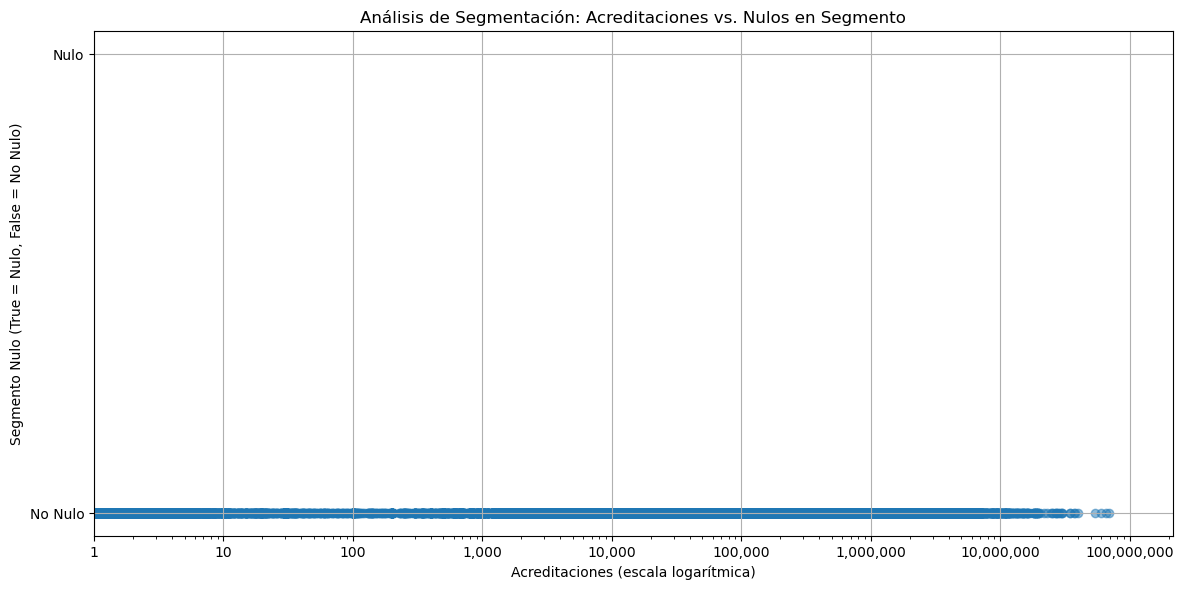

In [46]:

df_mora_prestamos['Segmento'] = df_mora_prestamos['Segmento'].isnull()


plt.figure(figsize=(12, 6))
plt.scatter(df_mora_prestamos['CA_acreditaciones'], df_mora_prestamos['Segmento'], alpha=0.5)


plt.title('Análisis de Segmentación: Acreditaciones vs. Nulos en Segmento')
plt.xlabel('Acreditaciones (escala logarítmica)')
plt.ylabel('Segmento Nulo (True = Nulo, False = No Nulo)')
plt.yticks([0, 1], ['No Nulo', 'Nulo'])  
plt.grid()


plt.xscale('log')
plt.xlim(left=1)  
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  

# Mostrar el gráfico
plt.tight_layout()
plt.show()


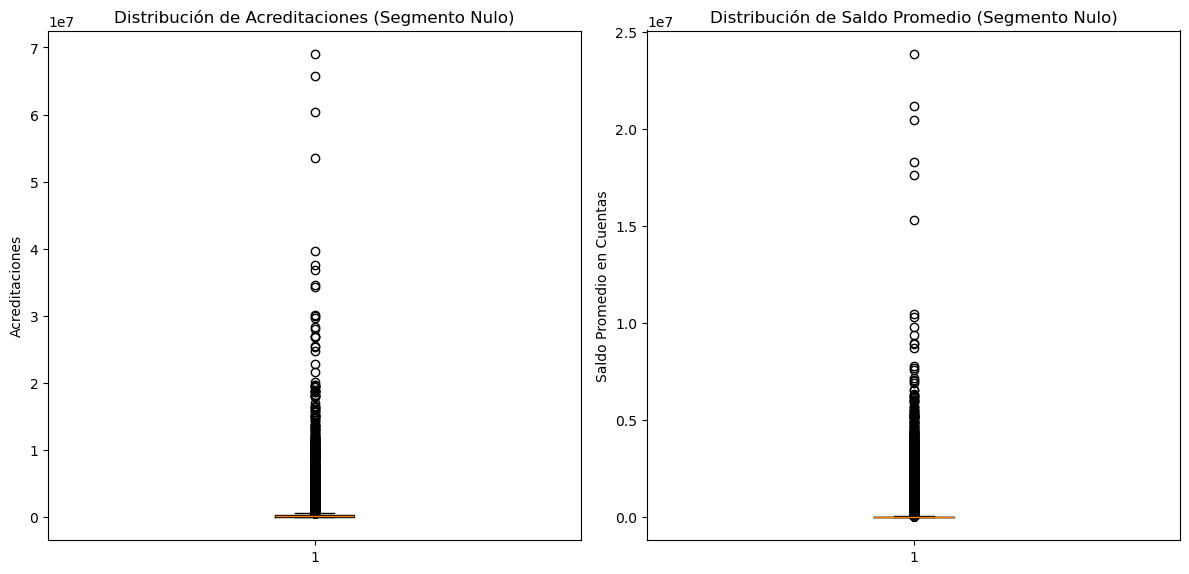

In [47]:
# Crea un gráfico de cajas para visualizar la distribución de acreditaciones y saldo promedio
plt.figure(figsize=(12, 6))

# Gráfico de cajas para Acreditaciones
plt.subplot(1, 2, 1)
plt.boxplot(df_mora_prestamos['CA_acreditaciones'].dropna())
plt.title('Distribución de Acreditaciones (Segmento Nulo)')
plt.ylabel('Acreditaciones')

# Gráfico de cajas para Saldo Promedio
plt.subplot(1, 2, 2)
plt.boxplot(df_mora_prestamos['CA_SaldoPromedio_$'].dropna())
plt.title('Distribución de Saldo Promedio (Segmento Nulo)')
plt.ylabel('Saldo Promedio en Cuentas')

plt.tight_layout()
plt.show()


In [48]:

def asignar_segmento(saldo):
    if saldo >= 191514:
        return 'A'
    elif 119257 <= saldo < 191514:
        return 'B'
    elif 61112 <= saldo < 119257:
        return 'C1'
    elif 42696 <= saldo < 61112:
        return 'C2'
    elif 30139 <= saldo < 42696:
        return 'C3'
    elif 19294 <= saldo < 30139:
        return 'D1'
    elif 6001 <= saldo < 19294:
        return 'D2'
    elif saldo < 6001:
        return 'D3'
    else:
        return None  

df_mora_prestamos['Segmento'] = None 

# Asigna segmentos basado en el saldo promedio
df_mora_prestamos.loc[df_mora_prestamos['CA_SaldoPromedio_$'].notnull(), 'Segmento'] = \
    df_mora_prestamos['CA_SaldoPromedio_$'].apply(asignar_segmento)

# Verificar los resultados
print(df_mora_prestamos['Segmento'].unique())  


['D2' 'C1' 'C3' 'D1' 'D3' 'C2' 'A' 'B']


Verificación de datos nulos en el conjunto de datos

In [49]:
df_mora_prestamos.isnull().sum()

Suc                                   0
Tipo Doc                              0
Nro Doc                               0
Denominacion                          0
CUIL                                  0
Periodo                               0
Id_Doc                                0
Segmento                              0
Genero                                0
Edad                                  0
Antiguedad                            0
CA_acreditaciones                     0
CA_SaldoPromedio_$                    0
CA_SaldoPromedio_U$s                  0
TC_Master_Cantidad                    0
TC_Master_SaldoPesos                  0
TC_Visa_Cantidad                      0
TC_Visa_SaldoPesos                    0
TC_Tuya_Cantidad                      0
TC_Tuya_SaldoPesos                    0
Cantidad_PrestamosPersonales          0
Importe_PrestamosPersonales           0
Tasa_PrestamosPersonales              0
Plazo_Maximo_PrestamosPersonales      0
Plazo_Promedio_PrestamosPersonales    0


In [50]:
numero_de_registros = df_mora_prestamos.shape[0]
print(f"Número de registros: {numero_de_registros}")

Número de registros: 1626264


## 3.2.2. Análisis y tratamientos de datos categoricos

In [78]:
df_mora_prestamos.dtypes

Suc                                     int64
Tipo Doc                                int64
Nro Doc                                 int64
Denominacion                           object
CUIL                                    int64
Periodo                                 int64
Id_Doc                                 object
Segmento                               object
Genero                                 object
Edad                                  float64
Antiguedad                            float64
CA_acreditaciones                     float64
CA_SaldoPromedio_$                    float64
CA_SaldoPromedio_U$s                  float64
TC_Master_Cantidad                    float64
TC_Master_SaldoPesos                  float64
TC_Visa_Cantidad                      float64
TC_Visa_SaldoPesos                    float64
TC_Tuya_Cantidad                      float64
TC_Tuya_SaldoPesos                    float64
Cantidad_PrestamosPersonales          float64
Importe_PrestamosPersonales       

Eliminar las columnas Denominacion e Id_Doc

In [81]:
df_mora_prestamos.drop(columns=['Denominacion', 'Id_Doc','Tipo Doc','CUIL'], inplace=True)

Se codifica la segmentación aplicando OrdinalEncoder

In [83]:
print(df_mora_prestamos['Segmento'].dtype)
print(df_mora_prestamos['Segmento'].unique())

object
['D2' 'C1' 'C3' 'D1' 'D3' 'C2' 'A' 'B']


In [86]:
# Importar LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# Crear el codificador
label_encoder = LabelEncoder()

In [87]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df_mora_prestamos['Segmento'] = df_mora_prestamos['Segmento'].fillna('Desconocido') 
df_mora_prestamos['Segmento'] = df_mora_prestamos['Segmento'].astype('category')
ordinal_encoder_segmento = OrdinalEncoder(categories=[['D3', 'D2', 'D1', 'C3', 'C2', 'C1', 'B', 'A']])
df_mora_prestamos['Segmento'] = ordinal_encoder_segmento.fit_transform(df_mora_prestamos[['Segmento']])

# Verificar los resultados
print(df_mora_prestamos[['Segmento']].head())

   Segmento
0       1.0
1       5.0
2       1.0
3       3.0
4       2.0


Hacemos un recuento de los registros dentro de cada segmento

In [91]:

conteo_segmento = df_mora_prestamos['Segmento'].value_counts().reset_index()
conteo_segmento.columns = ['Segmento', 'Cantidad']
conteo_segmento = conteo_segmento.sort_values(by='Cantidad', ascending=False)

# Mostrar el resultado
print(conteo_segmento)


   Segmento  Cantidad
0       0.0    726529
1       1.0    383091
2       2.0    142069
3       5.0    108587
4       3.0     99126
5       4.0     85192
6       6.0     42031
7       7.0     39639


Se convierte la variable Morosidad aplicando LabelEncoder

In [94]:


# Inicializa el LabelEncoder para la variable Morosidad
label_encoder_morosidad = LabelEncoder()

# Aplica el LabelEncoder a la columna 'Morosidad'
df_mora_prestamos['Morosidad'] = label_encoder_morosidad.fit_transform(df_mora_prestamos['Morosidad'])

# Verificar los resultados
print(df_mora_prestamos[['Morosidad']].head())


   Morosidad
0          0
1          0
2          0
3          0
4          0


Se cuenta los registros, lo cual se verifica que sigue existiendo el desbalanceo de datos

In [96]:
grouped_data = df_mora_prestamos.groupby(['Morosidad']).size().reset_index(name='Cantidad')
print(grouped_data)

   Morosidad  Cantidad
0          0   1532449
1          1     93815


Tratamiento de la variable Género

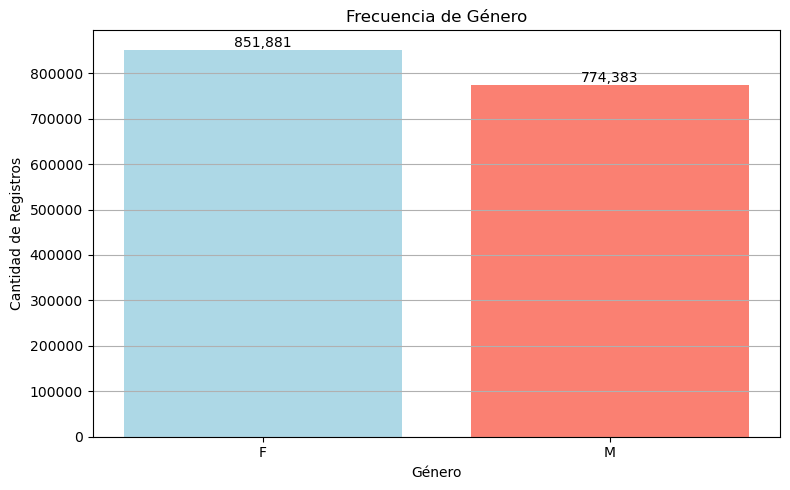

In [98]:
# Calcula la frecuencia de género
frecuencia_genero = df_mora_prestamos['Genero'].value_counts()

# Gráfico de barras con colores diferenciados y etiquetas
plt.figure(figsize=(8, 5))
bars = plt.bar(frecuencia_genero.index, frecuencia_genero.values, color=['lightblue', 'salmon'])
plt.title('Frecuencia de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Registros')

# Agregar etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [99]:
from sklearn.preprocessing import LabelEncoder
# Inicializa el LabelEncoder para la variable Género
label_encoder_genero = LabelEncoder()
# Aplica el LabelEncoder a la columna 'Genero'
df_mora_prestamos['Genero'] = label_encoder_genero.fit_transform(df_mora_prestamos['Genero'])
# Verifica los resultados
print(df_mora_prestamos[['Genero']].head())


   Genero
0       1
1       0
2       0
3       0
4       1


In [100]:
Tratamiento de la variable Localidad

SyntaxError: invalid syntax (3146606857.py, line 1)

In [ ]:
# Calcula la frecuencia de localidades
frecuencia_localidad = df_mora_prestamos['Localidad'].value_counts()

# Limita a las 10 localidades más frecuentes
top_localidades = frecuencia_localidad.head(10)

# Gráfico de barras horizontal para visualizar la frecuencia de localidades
plt.figure(figsize=(10, 6))
top_localidades.plot(kind='barh', color='lightblue')
plt.title('Frecuencia de las 10 Localidades más Comunes')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Localidad')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
cantidad_localidades_distintas = df_mora_prestamos['Localidad'].nunique()
print(f'Cantidad de localidades distintas: {cantidad_localidades_distintas}')

In [ ]:
# Calcula la frecuencia de cada localidad
frecuencia_localidad = df_mora_prestamos['Localidad'].value_counts()
# Reemplaza la localidad por su frecuencia
df_mora_prestamos['Localidad'] = df_mora_prestamos['Localidad'].map(frecuencia_localidad)
# Verifica los resultados
print(df_mora_prestamos[['Localidad']].head())

In [ ]:
print(df_mora_prestamos['Tasa_PrestamosPersonales'].value_counts())

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_tasa = LabelEncoder()
# Aplica el LabelEncoder a la columna 'Tasa_PrestamosPersonales'
df_mora_prestamos['Tasa_PrestamosPersonales'] = label_encoder_tasa.fit_transform(df_mora_prestamos['Tasa_PrestamosPersonales'])
# Verifica los resultados
print(df_mora_prestamos[['Tasa_PrestamosPersonales']].head())
# Mostrar el mapeo de las tasas
mapping = dict(zip(label_encoder_tasa.classes_, label_encoder_tasa.transform(label_encoder_tasa.classes_)))
print("Mapping de tasas:", mapping)


In [ ]:
print(df_mora_prestamos.columns)

In [ ]:
# Muestra los tipos de datos de cada columna
print(df_mora_prestamos.dtypes)

In [108]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame

# Definir las columnas y sus tipos deseados
columns_to_convert = {
    'Suc': 'int',  # int64
    'Nro Doc': 'int',  # int64
    'Periodo': 'int',  # int64
    'Segmento': 'int',  # float64
    'Genero': 'int',  # int32
    'Edad': 'int',  # float64
    'Antiguedad': 'int',  # float64
    'CA_acreditaciones': 'float',  # float64
    'CA_SaldoPromedio_$': 'float',  # float64
    'CA_SaldoPromedio_U$s': 'float',  # float64
    'TC_Master_Cantidad': 'int',  # float64
    'TC_Master_SaldoPesos': 'float',  # float64
    'TC_Visa_Cantidad': 'int',  # float64
    'TC_Visa_SaldoPesos': 'float',  # float64
    'TC_Tuya_Cantidad': 'int',  # float64
    'TC_Tuya_SaldoPesos': 'float',  # float64
    'Cantidad_PrestamosPersonales': 'int',  # float64
    'Importe_PrestamosPersonales': 'float',  # float64
    'Tasa_PrestamosPersonales': 'int',  # int32
    'Plazo_Maximo_PrestamosPersonales': 'int',  # float64
    'Plazo_Promedio_PrestamosPersonales': 'float',  # float64
    'Atraso_Maximo_PrestamosPersonales': 'int',  # float64
    'Sit_Maxima_CENDEU': 'int',  # float64
    'Deuda_Sist_Financiero': 'float',  # float64
    'SituacionPonderada': 'float',  # float64
    'InflaciónMensual': 'float',  # float64
    'RemuneracionPromedio': 'int',  # float64
    'TasaBADLAR_Promedio': 'float',  # float64
    'TotalDeuda': 'float',  # float64
    'Situación': 'int',  # float64
    'Morosidad': 'int',  # int32
    'Localidad': 'int',  # int64
    'Cantidad_PlazoFijo': 'int',  # float64
    'Plazo Fijo': 'float',  # float64
    'Tasa_Ponderada': 'float',  # float64
    'Acreditaciones_sueldos': 'float',  # float64
    'Otras_Acreditaciones': 'float'  # float64
}

# Convertir cada columna
for column, dtype in columns_to_convert.items():
    if dtype == 'int':
        df_mora_prestamos[column] = pd.to_numeric(df_mora_prestamos[column], errors='coerce').fillna(0).astype(int)
    elif dtype == 'float':
        df_mora_prestamos[column] = pd.to_numeric(df_mora_prestamos[column], errors='coerce').fillna(0).astype(float)

# Verificar los tipos de datos después de la conversión
print(df_mora_prestamos.dtypes)



Suc                                     int32
Nro Doc                                 int32
Periodo                                 int32
Segmento                                int32
Genero                                  int32
Edad                                    int32
Antiguedad                              int32
CA_acreditaciones                     float64
CA_SaldoPromedio_$                    float64
CA_SaldoPromedio_U$s                  float64
TC_Master_Cantidad                      int32
TC_Master_SaldoPesos                  float64
TC_Visa_Cantidad                        int32
TC_Visa_SaldoPesos                    float64
TC_Tuya_Cantidad                        int32
TC_Tuya_SaldoPesos                    float64
Cantidad_PrestamosPersonales            int32
Importe_PrestamosPersonales           float64
Tasa_PrestamosPersonales                int32
Plazo_Maximo_PrestamosPersonales        int32
Plazo_Promedio_PrestamosPersonales    float64
Atraso_Maximo_PrestamosPersonales 

Eliminacion de algunos outliers incosistente en el dataset

In [115]:
# Filtrar 'TotalDeuda' para eliminar registros donde el valor es cero o negativo
df_mora_prestamos = df_mora_prestamos[df_mora_prestamos['TotalDeuda'] > 0]

# Filtrar 'SituacionPonderada' para eliminar registros donde el valor es mayor a 6
df_mora_prestamos = df_mora_prestamos[df_mora_prestamos['SituacionPonderada'] <= 6]

# Filtrar 'Edad' para dejar solo los registros entre 18 y 98 años
df_mora_prestamos = df_mora_prestamos[(df_mora_prestamos['Edad'] >= 18) & (df_mora_prestamos['Edad'] <= 98)]

# Filtrar 'Sit_Maxima_CENDEU' para eliminar registros donde el valor es menor a 6
df_mora_prestamos = df_mora_prestamos[df_mora_prestamos['Sit_Maxima_CENDEU'] < 6]

# Filtrar 'Antiguedad' para dejar solo los registros donde el valor es menor a 30
df_mora_prestamos = df_mora_prestamos[df_mora_prestamos['Antiguedad'] < 30]

Eliminación de variables con relacion directa y que derivan en moroso y no morosos

In [120]:
# Lista de variables a eliminamos
variables_a_eliminar = [
    
    'Atraso_Maximo_PrestamosPersonales',
    'Situación',
]

df_mora_prestamos.drop(columns=variables_a_eliminar, inplace=True, errors='ignore')

eliminadas = [var for var in variables_a_eliminar if var not in df_mora_prestamos.columns]
print(f"Las siguientes variables han sido eliminadas: {eliminadas}")

Las siguientes variables han sido eliminadas: ['Atraso_Maximo_PrestamosPersonales', 'Situación']


Guardar el conjuntos de datos

In [125]:
# Guardar el DataFrame df_mora_prestamos en un archivo CSV en el mismo directorio
df_mora_prestamos.to_csv('D:/Tesis/Definitivos/Nuevo/df_mora_prestamos2.csv', index=False)